https://github.com/KJ-1289/432-Foundations-of-Data-Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import uniform
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")
import os

**1. Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).**

In [2]:
array = np.round(uniform(100, 500, 10)).astype(int)
array_sorted = np.sort(array)
array_sorted

array([283, 307, 309, 310, 326, 381, 407, 411, 454, 462])

**2. Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.**

In [3]:
def fact_loop(x):
    fact = 1
    if x < 0:
        return print("Factorial does not exist!")
    elif x == 0:
        return 1
    else: 
        for i in range(1, x + 1):
            fact = fact * i
    return fact

def array_for_loop(x):
    fill = np.array([], dtype = 'int')
    time = np.array([], dtype = 'float64')
    for i in range(len(x)):
        start_time = timer()
        fact = fact_loop(x[i])
        end_time = timer()
        run_time = (end_time - start_time) * 1000
        fill = np.append(fill, fact)
        time = np.append(time, run_time)
    return fill, time

In [4]:
array_for_loop = array_for_loop(array_sorted)
loop_run_times = array_for_loop[1]
loop_run_times

array([0.0605, 0.0448, 0.0573, 0.0423, 0.0295, 0.0377, 0.0411, 0.0654,
       0.0622, 0.0495])

**3. Calculate the factorial of each of the numbers using recursion.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.**

In [5]:
def fact_rec(x):
    if x < 0:
        return print("Factorial does not exist!")
    elif x == 0:
        return 1
    elif x == 1:
        return 1
    else:
        return x * fact_rec(x-1)

def array_rec_func(x):
    fill = np.array([], dtype = 'int')
    time = np.array([], dtype = 'float64')
    for i in range(len(x)):
        start_time = timer()
        fact = fact_rec(x[i])
        end_time = timer()
        run_time = (end_time - start_time) * 1000
        fill = np.append(fill, fact)
        time = np.append(time, run_time)
    return fill, time

In [6]:
array_rec_func = array_rec_func(array_sorted)
rec_run_times = array_rec_func[1]
rec_run_times

array([0.2844, 0.2067, 0.1891, 0.1911, 0.2641, 0.3021, 0.323 , 0.2631,
       0.2891, 0.2762])

**4. Organize the results of the study into a table showing the number, its factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.**

In [7]:
fact_df = pd.DataFrame(np.array([array_sorted, array_for_loop[0], rec_run_times, loop_run_times, 
                                 rec_run_times - loop_run_times])).transpose()
fact_df = fact_df.rename(columns = {0: "Array Number", 1: "Factorial", 2: "Recursive Run Time", 3: "For Loop Run Time",
                                   4: "Difference"})
fact_df

,Array Number,Factorial,Recursive Run Time,For Loop Run Time,Difference
0,283,3761264809797257894735555301426381666905812284...,0.2844,0.0605,0.2239
1,307,7342641689008414586776116263451665625319292539...,0.2067,0.0448,0.1619
2,309,6988138948263088330526565370252219208928877095...,0.1891,0.0573,0.1318
3,310,2166323073961557382463235264778187954767951899...,0.1911,0.0423,0.1488
4,326,2425192809059758909257722451160643102411732991...,0.2641,0.0295,0.2346
5,381,3596379714198470286834416093499120610424229900...,0.3021,0.0377,0.2644
6,407,1124725342115113696939532250755210726505023140...,0.323,0.0411,0.2819
7,411,3162682753994239743534273287479944408878237177...,0.2631,0.0654,0.1977
8,454,7267080816354205991099313803658062605203626853...,0.2891,0.0622,0.2269
9,462,1419159881532604159360102000036080964658416816...,0.2762,0.0495,0.2267


**5. Use Python Matplotlib or Seaborn to generate a graph that has a number on the horizontal axis and with execution time in milliseconds on the vertical axis.  The plot should show execution times of recursion and the loop.**

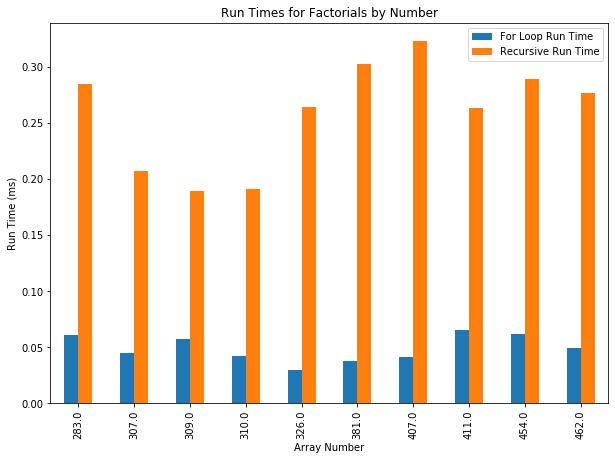

In [8]:
df_plot = fact_df[["Array Number", "Recursive Run Time", "For Loop Run Time"]].astype(float)
run_times_pivot = pd.pivot_table(df_plot, index = df_plot["Array Number"])
run_times_plot = run_times_pivot.loc[:,["For Loop Run Time", "Recursive Run Time"]].plot.bar(stacked = False, figsize=(10,7))
plt.ylabel("Run Time (ms)")
plt.xlabel("Array Number")
plt.title("Run Times for Factorials by Number")
plt.show()

### Executive Summary:

In this exercise we implemented both a For Loop and Recursive Function for calculating factorials.  A recursive function contains two parts: a base case and a recursive case.  In the recursive case, the function calls itself, while the base case is when the function knows not to call again so it does not go into an infinite loop.  While recursion can make the solution clearer, there is no performance benefit.  This is well illustrated in the above functions.  For each array, the recursive function ran roughly .20 ms longer than the for loop.  Recursive functions may come in handy for more complicated algorithms.  However, in this instance, the for loop is more useful.  